## Data Mining Final Project

### 코로나 데이터 시각화
##### 목차
* [1. 분석 배경 및 목적](#chapter1)  
    * [1-1. 분석 목적](#section_1_1)
    * [1-2. 패키지 설치](#section_1_2)
* [2. 데이터 소개 및 설명](#chapter2)
    * [2-1. 데이터 제공](#section_2_1)
    * [2-2. 데이터 소개](#section_2_2)
    * [2-3. 데이터 불러오기](#section_2_3)
* [3. 분석 결과](#chapter3)
    * [3_1. 코로나로 인한 검색 트랜드 변화](#section_3_1)
        * [결과](#section_3_1_1)
    * [3_2. 지역별 확진자 수 현황](#section_3_2)
        * [결과](#section_3_2_1)
    * [3_3. 대구 코로나 감염의 집단 감염 여부](#section_3_3)
        * [결과](#section_3_3_1)
    * [3_4. 집단 감염이 100명 이상인 감염경로](#section_3_4)
        * [결과](#section_3_4_1)
    * [3_5. 연령대 별 확진자 수](#section_3_5)
        * [결과](#section_3_5_1)
    * [3_6. 연령대 별 접촉자 수 평균](#section_3_6)
        * [결과](#section_3_6_1)
* [4. 결론](#chapter4)
    * [분석을 통한 내용](#section_4_1)

### 1. 분석 배경 및 목적 <a class="anchor" id="chapter1"></a> 

* 데이콘에서 진행했던 코로나 데이터 시각화 AI 경진대회에 사용했던 데이터를 사용


#### 1-1. 분석 목적 <a class="anchor" id="section_1_1"></a>

* 코로나로 인하여 검색량에 변화와 가장 많이 코로나 피해를 입은 지역,   
가장 많이 확진된 지역에 집단감염 여부, 연령대 확진자와 접촉자 평균을 알아보기 위해 진행하였다.

#### 1-2. 패키지 설치 <a class="anchor" id="section_1_2"></a>

In [1]:
import numpy as np
import pandas as pd

import plotly
import matplotlib.pylab as plt

import seaborn as sns

import plotly.express as px

import plotly.offline as plyo
import cufflinks

import plotly.graph_objects as go

In [2]:
from matplotlib import font_manager, rc  # matplotlib 패키지의 font_manager를 로드
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  # 폰트 이름을 변수에 할당
rc('font', family=font_name)  # 폰트 이름으로 설정

### 2. 데이터 소개 및 설명 <a class="anchor" id="chapter2"></a>

#### 2-1. 데이터 제공 <a class="anchor" id="section_2_1"></a>

* 데이콘

#### 2-2. 데이터 소개 <a class="anchor" id="section_2_2"></a>
* '코로나 데이터 시각화 AI 경진대회' 데이터
    * Case.csv.csv : 확진자에 지역 관련 데이터
    * PatientInfo.csv : 환자의 정보 데이터
    * Searchtrend.csv : 일별 검색량 데이터

#### 2-3. 데이터 불러오기 <a class="anchor" id="section_2_3"></a>

In [3]:
case = pd.read_csv("coronavirusdataset_20200430/Case.csv")
patient_info = pd.read_csv('coronavirusdataset_20200430/PatientInfo.csv')
SearchTrend = pd.read_csv('coronavirusdataset_20200430/SearchTrend.csv')

### 3. 분석 결과 <a class="anchor" id="chapter3"></a>

#### 3-1. 코로나로 인한 검색 트랜드 변화 <a class="anchor" id="section_3_1"></a>  
* SearchTrend.csv 이용
* 결측값이 있나 확인 후 2019.12.01 ~ 2020.04.29까지 알아보기 위하여 행을 지정 후 만든 데이터를 새로운 이름으로 넣어준다.

In [4]:
SearchTrend.isnull().sum() # 결측값 확인

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [5]:
# 1430: = 12월 1일 부터 / cold,flu,pneumonia,coronavirus 모두 1430행 12월 1일부터
Search=SearchTrend['date']
Search1Year=Search[1430:]
SearchC=SearchTrend['cold']
SearchCold=SearchC[1430:]
SearchF=SearchTrend['flu']
SearchFlu=SearchF[1430:]
SearchP=SearchTrend['pneumonia']
SearchPneumonia=SearchP[1430:]
SearchCorona=SearchTrend['coronavirus']
SearchCoronavirus=SearchCorona[1430:]
Search1Year

1430    2019-12-01
1431    2019-12-02
1432    2019-12-03
1433    2019-12-04
1434    2019-12-05
           ...    
1576    2020-04-25
1577    2020-04-26
1578    2020-04-27
1579    2020-04-28
1580    2020-04-29
Name: date, Length: 151, dtype: object

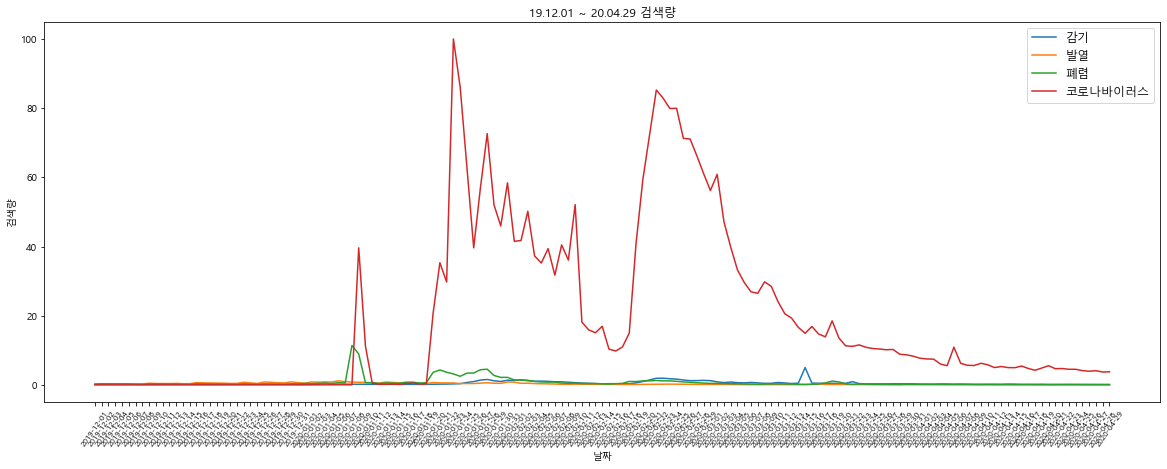

In [20]:
plt.figure(figsize=(20,7))     # 사이즈
plt.plot(Search1Year,SearchCold)  # 보여주기
plt.plot(Search1Year,SearchFlu)
plt.plot(Search1Year,SearchPneumonia)
plt.plot(Search1Year,SearchCoronavirus)
plt.title('19.12.01 ~ 20.04.29 검색량') # 제목
plt.xlabel('날짜') # x축 이름
plt.ylabel('검색량') # y축 이름
plt.xticks(fontsize=8,rotation=55) # 폰트 사이즈
plt.legend(['감기','발열','폐렴','코로나바이러스'],fontsize=12) # 그래프에 색에 따른 이름
plt.show()

##### 결과 <a class="anchor" id="section_3_1_1"></a>
* 20.01.07에 사람들이 코로나에 여부를 알았으며, 20.01.18에 사람들에 관심이 매우 증가한 것을 알 수 있다.

#### 3-2. 지역별 확진자 수 현황 <a class="anchor" id="section_3_2"></a>  
* Case.csv 이용
* 지역별로 groupby()하여 지역별 총 confirmed를 내림차순으로 정렬

In [7]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [8]:
group_province = case.groupby("province").sum() # 지역별로 groupby하여 group를 묶어서 지역별 확진자 보기

In [9]:
group_province = group_province.sort_values(by="confirmed", ascending=False) # ascending = False 내림차순정렬 / confirmed 기준 내림차순
group_province.head(20) # 상위 20개 보기 / 18개 밖에 없어서 18개만 보여준다

,case_id,group,confirmed
province,,,
Daegu,10800045,6,6650
Gyeongsangbuk-do,72000078,9,1314
Seoul,11000066,8,574
Gyeonggi-do,18000045,6,556
Busan,9900045,6,139
Chungcheongnam-do,20500015,2,137
Gyeongsangnam-do,61000055,7,115
Incheon,7000015,2,79
Gangwon-do,18000021,3,51


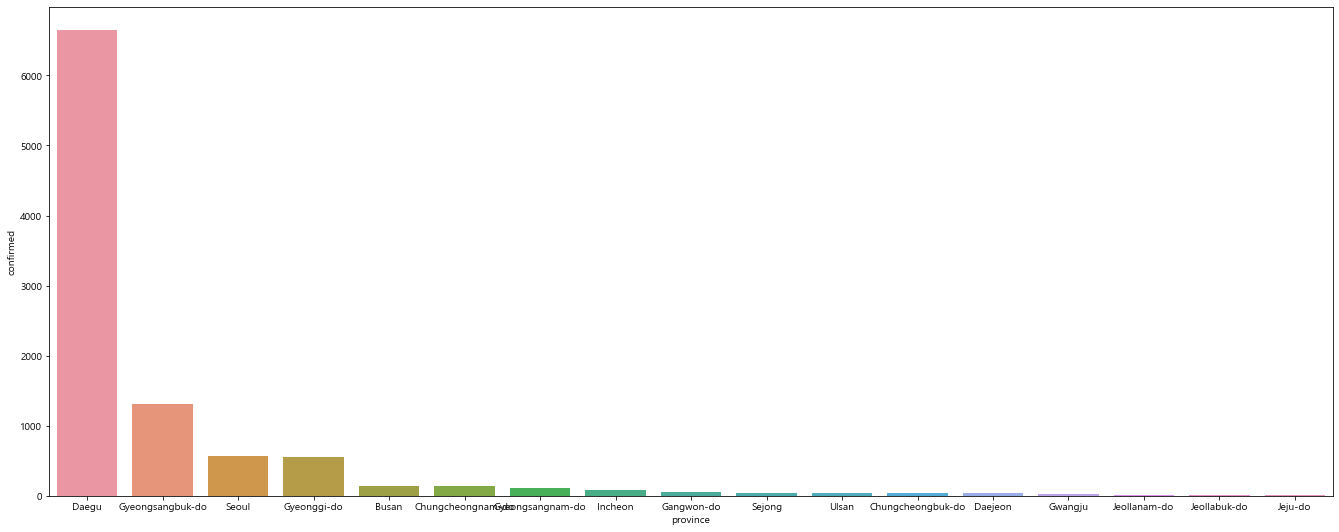

In [10]:
plt.figure(figsize=(23,9))
sns.barplot(data=group_province, x=group_province.index, y='confirmed') # group_province에 x,y로 그래프 그리기
plt.show()

##### 결과 <a class="anchor" id="section_3_2_1"></a>
* 위에 표와 같이 대구 -> 경북 -> 서울 순으로 확진자가 많고 대구가 절반 이상을 차지한 것을 알 수 있다.

#### 3-3. 대구 코로나 감염의 집단 감염 여부 <a class="anchor" id="section_3_3"></a>  
* Case.csv 사용
* Daegu 행을 찾아서 case_Daegu로 만든다.

In [11]:
case_Daegu=case[20:29]   # 대구가 20:29까지여서 20:29까지 추출후 case_Daegu로 만든다.
case_Daegu

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510,35.84008,128.5667
21,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651
22,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,128,35.885592,128.556649
23,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,100,35.857393,128.466653
24,1200005,Daegu,Dong-gu,True,Fatima Hospital,37,35.88395,128.624059
25,1200006,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-
26,1200007,Daegu,-,False,overseas inflow,24,-,-
27,1200008,Daegu,-,False,contact with patient,929,-,-
28,1200009,Daegu,-,False,etc,724,-,-


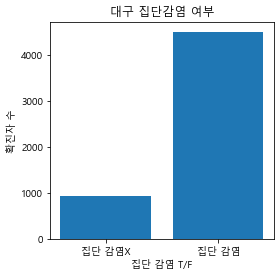

In [12]:
plt.figure(figsize=(4,4))
plt.bar(case_Daegu['group'], case_Daegu['confirmed']) # 집단감염 T/F, 확진자 수
plt.title('대구 집단감염 여부') # 제목
plt.xlabel('집단 감염 T/F') # x축
plt.ylabel('확진자 수') # y축
plt.xticks([0,1],['집단 감염X','집단 감염'])
plt.show()

##### 결과 <a class="anchor" id="section_3_3_1"></a>
* 대구 전체 확진자 6천명 이상 가운데 4천명 이상이 집단으로 감염된 것을 확인할 수 있다.

#### 3-4. 집단 감염이 100명 이상인 감염경로 <a class="anchor" id="section_3_4"></a>  
* Case.csv 이용
* confirmed가 100이상 추출

In [13]:
#확진자 수가 100명 이상인 데이터
case100 = case[case['confirmed'] >= 100]   # case데이터에서 confirmed가 100개 이상인 것
case100

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
8,1000009,Seoul,-,False,overseas inflow,321,-,-
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510,35.84008,128.5667
21,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651
22,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,128,35.885592,128.556649
23,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,100,35.857393,128.466653
27,1200008,Daegu,-,False,contact with patient,929,-,-
28,1200009,Daegu,-,False,etc,724,-,-
60,2000007,Gyeonggi-do,-,False,overseas inflow,225,-,-
74,4100001,Chungcheongnam-do,Cheonan-si,True,gym facility in Cheonan,103,36.81503,127.1139
87,6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566,-,-


In [14]:
#확진자 수가 100명 이상인 감염경로 파악 ( 크기순)
case100_1 = pd.DataFrame(case100.groupby(['infection_case'])['confirmed'].max()) # case100데이터를 가지고 infection_case, confirmed groupby. max
case100_1 = case100_1.sort_values(by=['confirmed'], ascending=False)   # confirmed를 기준으로 내림차순 정렬
case100_1

,confirmed
infection_case,
Shincheonji Church,4510
contact with patient,929
etc,724
overseas inflow,321
Second Mi-Ju Hospital,196
Hansarang Convalescent Hospital,128
Cheongdo Daenam Hospital,120
gym facility in Cheonan,103
Daesil Convalescent Hospital,100


In [15]:
# 100명 이상 감염경로 그래프
# case100_1데이터에서 values(값) = confirmed, names = case100_1.index 크기 순으로 나온값
fig = px.pie(case100_1, values='confirmed', names= case100_1.index,
                 title= '집단 감염이 100명 이상인 감염경로') # 제목
fig.update_traces( textinfo='percent+label')  # percent와 label이 나오게
fig.show()

##### 결과 <a class="anchor" id="section_3_4_1"></a>
표를 보면 알 수 있듯이 신천지가 63.2%로 가장 높고, 확진자, 기타, 해외유입을 제외하면 미주병원, 한사랑 요양병원 순으로 높은 것을 알 수 있다.

#### 3-5. 연령대 별 확진자 수 <a class="anchor" id="section_3_5"></a> 
* PatientInfo.csv 이용

In [16]:
# patient_info데이터를 groupby를 age별로 하고 count()한다. 
patient_1 = patient_info.groupby('age').count().patient_id 

fig = patient_1.iplot(asFigure=True, kind='bar', color = 'green', title="연령대 별 확진자 수", xTitle='연련대', yTitle='확진자 수')
fig.show()

##### 결과 <a class="anchor" id="section_3_5_1"></a>
* 20s -> 50s -> 40s 순으로 확진자가 많다.
* 10s는 높지 않은 비율을 보여준다.

#### 3-6. 연령대 별 접촉자 수 평균 <a class="anchor" id="section_3_6"></a> 
* PatientInfo.csv 이용
* 90s와 100s에 결측 값이 있어 제거 후 평균 추출

In [17]:
#나이대 별 접촉자 수 평균
# patient_info에서 age groupby하고 contact_number에 평균을 구한다.
patient_mean = pd.DataFrame(patient_info.groupby(['age'])['contact_number'].mean())
patient_mean

,contact_number
age,
0s,1.818182
100s,NaN
10s,38.969697
20s,15.851064
30s,16.191919
40s,19.603306
50s,18.108108
60s,22.878378
70s,5.612903


In [18]:
# 결측치가 있는 행 제거 (90대와 100대)
patient_mean = patient_mean.dropna(axis=0) # 평균을 구하고 결측값이 있는 행을 제거한다.
patient_mean

,contact_number
age,
0s,1.818182
10s,38.969697
20s,15.851064
30s,16.191919
40s,19.603306
50s,18.108108
60s,22.878378
70s,5.612903
80s,15.230769


In [19]:
labels = ['0s','10s','20s','30s','40s', '50s','60s','70s','80s'] # 연령대 age
values = [1.818182, 38.969697, 15.851064, 16.191919,19.603306, 18.108108,22.878378,5.612903,15.230769] # 평균 contact_number

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, title = '연령별 접촉자 평균')])
fig.update_traces( textinfo='percent+label')
fig.show()

##### 결과 <a class="anchor" id="section_3_6_1"></a>
* 연령대 별 확진자는 20s가 가장 많았는데, 접촉자는 10s가 가장 높은 비율을 보이고 있다.
* 연령대 별 확진자 수와 접촉자 수는 깊은 관계를 가지고 있지 않는 것 같다.

### 4. 결론 <a class="anchor" id="chapter4"></a>

#### 4-1. 분석을 통한 내용 <a class="anchor" id="section_4_1"></a>

1. 코로나가 알려진 이후 검색량이 코로나 위주로 크게 바뀌였다.
2. 대구에서 발생한 코로나 확진자들은 절반 이상이 집단으로 감염되었다.
3. 집단 감염이 100명 이상인 곳은 대구 신천지가 63.2%로 많은 비율을 차지한다.
4. 20대 확진자가 가장 많지만, 연령별로 접촉한 인원은 10대가 가장 높다.